# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [29]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    value = numpy.sin(x)*x**2
    return value

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    integral = -(x**2)*numpy.cos(x)+2*x*numpy.sin(x)+2*numpy.cos(x)-2
    return integral

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    analyticlim = g(xmax)-g(xmin)
    return analyticlim

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [85]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N%2:
        N=N+1
    h = (xmax - xmin)/N
    value = f(xmin)+f(xmax)
    x=xmin + h
    for i in range (1,int(N/2)+1):
        value += 4*f(x)
        x += 2*h
    x = xmin + 2*h
    for i in range (1,int(N/2)):
        value += 2*f(x)
        x += 2*h
    return (h/3)*value

Make sure you have implemented Simpson's rule correctly:

In [86]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [87]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Error in Numerical Integral compared to Analytical Integral vs Number of Panels Used')

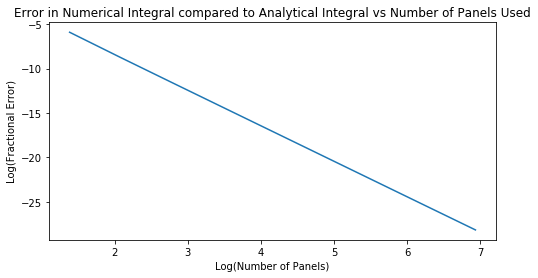

In [123]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = [0,0,0,0,0,0,0,0,0]
for i in range (0,9):
    result_numeric[i]=integrate_numeric(x0, x1, panel_counts[i])
fracterr = (result_analytic-result_numeric)/result_analytic
plt.figure(figsize=(8, 4))
plt.xlabel("Log(Number of Panels)")
plt.ylabel("Log(Fractional Error)")
plt.plot(numpy.log(panel_counts), numpy.log(fracterr))
plt.title("Error in Numerical Integral compared to Analytical Integral vs Number of Panels Used")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases the error of the numerical method compared to the analytical integral decreases linearly and hence the error in the numerical method also decreases. However when the number of panels gets to too high this relationship breaks down and the error starts increasing for larger numbers of panels. This is due to numerical round-off issues that occur with larger numbers of decimal places.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule were used, increasing the panel count would decrease the error and increase the accuracy of the numerical value but the decrease in error would not be as sharp as if Simpson's rule were used. However, this linear relationship continues for a much larger numbers of panels. 